## **Hypothesis: Regime-Dependent Momentum and Reversal Effects**

### **Step 1. Economic Rationale**

### **1) Academic Evidence**

### **Paper**

- **Title**: *Market-State Dependent Momentum Strategies: An Empirical Examination of Anomalies in Asset Pricing*  
- **Author**: Arnau Rodon Comas (Universitat Pompeu Fabra, University of Essex)  
- **Data**: CRSP stock data (1940–2023, covering NYSE/AMEX/NASDAQ)  
- **Objective**
  - To test a conditional investment strategy that switches between momentum and reversal depending on market state (bullish/bearish).  
  - To address the limitations of traditional momentum strategies and explore inefficiencies in asset pricing.  

### **Key Summary**

The **Market-State Dependent Momentum-Reversal Strategy** is a dynamic investment approach that switches between momentum and reversal depending on the **market state**.  

- **Bull Market** (positive cumulative return over the past 24 months):  
  → Applies a **momentum strategy** (buying winners, selling losers).  

- **Bear Market** (negative cumulative return over the past 24 months):  
  → Applies a **reversal strategy** (buying losers, selling winners).  
 
- **Findings**
  - Traditional momentum strategies weakened significantly after 2000.  
  - This conditional strategy has **consistently delivered excess returns**.  
  - Achieves an **average monthly excess return of ~1.03% (over 12% annually)** with a **t-statistic of 4.82**, confirming strong statistical significance.  

### **2) Hypothesis Development**

**Hypothesis** : Asset pricing anomalies exhibit regime dependency—momentum effects tend to dominate during bull markets, while reversal effects are more pronounced in bear markets. A dynamic investment strategy that conditionally switches between momentum and reversal signals based on market state can deliver superior risk-adjusted returns.

### **Step 2. Data Collection**

In [1]:
!pip install finance-datareader

     ---------------------------------------- 0.0/48.2 kB ? eta -:--:--
     -------------------------------- ----- 41.0/48.2 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 48.2/48.2 kB 808.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import FinanceDataReader as fdr
df_all = fdr.StockListing('KOSPI')
print(df_all.columns)

Index(['Code', 'ISU_CD', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode',
       'Changes', 'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount',
       'Marcap', 'Stocks', 'MarketId'],
      dtype='object')


'Code' → 종목코드  
'Name' → 회사명  
'Marcap' → 시가총액

In [2]:
import FinanceDataReader as fdr
import pandas as pd
from tqdm import tqdm

df_all = fdr.StockListing('KOSPI')
kospi200_like = df_all.sort_values(by='Marcap', ascending=False).head(200)
kospi200_like = kospi200_like[['Code', 'Name']]
kospi200_like.columns = ['ticker', 'name']

# 기간 설정
start_date = '2015-01-01'
end_date = '2024-12-31'

price_list = []

for _, row in tqdm(kospi200_like.iterrows(), total=len(kospi200_like)):
    code = row['ticker']
    try:
        df = fdr.DataReader(code, start=start_date, end=end_date)
        df = df[['Close']].copy()
        df.index.name = 'date'
        df['ticker'] = code
        df = df.reset_index()
        
        # 월말 종가 추출
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date').resample('M').last().dropna().reset_index()
        price_list.append(df)

    except Exception as e:
        print(f"[{code}] 에러: {e}")
        continue

df_price = pd.concat(price_list)
df_price = df_price[['date', 'ticker', 'Close']]
df_price.columns = ['date', 'ticker', 'close']

df_price.to_csv("kospi200_fdr_prices_monthly.csv", index=False)
df_price.head()

  0%|          | 0/200 [00:00<?, ?it/s]C:\Users\shinw\AppData\Local\Temp\ipykernel_60836\3065519366.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('date').resample('M').last().dropna().reset_index()
  0%|          | 1/200 [00:00<00:47,  4.17it/s]C:\Users\shinw\AppData\Local\Temp\ipykernel_60836\3065519366.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('date').resample('M').last().dropna().reset_index()
  1%|          | 2/200 [00:00<00:37,  5.34it/s]C:\Users\shinw\AppData\Local\Temp\ipykernel_60836\3065519366.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('date').resample('M').last().dropna().reset_index()
  2%|▏         | 3/200 [00:00<00:31,  6.23it/s]C:\Users\shinw\AppData\Local\Temp\ipykernel_60836\3065519366.py:27: FutureWarning: 'M' is deprecated an

,date,ticker,close
0,2015-01-31,005930,27300
1,2015-02-28,005930,27140
2,2015-03-31,005930,28820
3,2015-04-30,005930,28200
4,2015-05-31,005930,26140


In [1]:
import FinanceDataReader as fdr
import pandas as pd
from tqdm import tqdm

df_price = pd.read_csv("kospi200_fdr_prices_monthly.csv")

In [2]:
# 월말 가격을 피벗
price_pivot = df_price.pivot(index='date', columns='ticker', values='close').sort_index()
price_pivot.head()

ticker,80,100,120,150,155,240,270,660,720,810,...,383220,395400,402340,443060,450080,454910,457190,462870,484870,489790
date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,23250.0,24107.0,191500.0,81925.0,50123.0,25200.0,46000.0,47650.0,42470.0,295000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,22850.0,24107.0,181000.0,94134.0,55049.0,23700.0,45500.0,46600.0,48065.0,255000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,22200.0,26365.0,195000.0,91771.0,56000.0,21100.0,45200.0,45550.0,49038.0,267500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,22700.0,32568.0,204500.0,98073.0,60667.0,21250.0,49600.0,46150.0,50497.0,282500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-31,21400.0,37644.0,188000.0,90196.0,59802.0,19650.0,47650.0,51100.0,43054.0,304000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Step 3. Implementation of the Reversal Momentum Strategy**

In [3]:
# 수익률 계산: t / t-1 - 1
ret_1m = price_pivot.pct_change(periods=1)
ret_3m = price_pivot.pct_change(periods=3)

In [4]:
# Z-score 표준화
def zscore(df):
    return (df - df.mean(axis=1, skipna=True).values[:, None]) / df.std(axis=1, skipna=True).values[:, None]

score = -zscore(ret_1m) - 0.5 * zscore(ret_3m)  # 낙폭 클수록 점수 높음
score.head()

ticker,80,100,120,150,155,240,270,660,720,810,...,383220,395400,402340,443060,450080,454910,457190,462870,484870,489790
date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,0.648648,-1.850818,0.270436,-0.109956,-0.262776,0.994113,-0.184095,0.745090,0.253513,0.375174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-31,0.698190,-1.695367,0.738642,0.840813,0.184315,0.971723,0.420910,-0.729455,1.419183,-0.623151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# KOSPI200 벤치마크
benchmark_daily = fdr.DataReader('KS200', start='2015-01-01', end='2024-12-31')
benchmark = benchmark_daily['Close'].resample('M').last()
benchmark.name = 'KOSPI200'

C:\Users\shinw\AppData\Local\Temp\ipykernel_60048\1415621465.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  benchmark = benchmark_daily['Close'].resample('M').last()


In [6]:
# 파라미터 설정
n_holdings = 20             # 포트폴리오 종목 수
lookback_months = 24        # 시장 상태 판단 기간

strategy_returns = []       
strategy_dates = []         

In [7]:
for i in range(lookback_months, len(score) - 1):
    current_date = score.index[i]
    next_date = score.index[i + 1]

    # 시장 상태 판단: 벤치마크 24개월 수익률
    try:
        market_return = benchmark.loc[current_date] / benchmark.loc[score.index[i - lookback_months]] - 1
    except KeyError:
        continue

    market_state = 'UP' if market_return > 0 else 'DOWN'

    # 종목 선택
    if market_state == 'UP':
        current_momentum = ret_1m.iloc[i]
        selected = current_momentum.sort_values(ascending=False).head(n_holdings).index
    else:
        current_score = score.iloc[i]
        selected = current_score.sort_values(ascending=False).head(n_holdings).index

    # 다음 달 수익률 계산
    next_return = ret_1m.iloc[i + 1][selected].mean()
    strategy_returns.append(next_return)
    strategy_dates.append(next_date)

In [8]:
result = pd.DataFrame({
    'date': strategy_dates,
    'strategy': strategy_returns
}).set_index('date')

result['cum_strategy'] = (1 + result['strategy']).cumprod()

# 벤치마크 및 전략 누적 수익률
benchmark_ret = benchmark.pct_change()
result['benchmark'] = benchmark_ret.reindex(result.index)
result['cum_benchmark'] = (1 + result['benchmark']).cumprod()

In [9]:
result.index = pd.to_datetime(result.index)

In [10]:
def calculate_cagr(series):
    years = (series.index[-1] - series.index[0]).days / 365.25
    return series.iloc[-1]**(1/years) - 1

cagr_strategy = calculate_cagr(result['cum_strategy'])
cagr_benchmark = calculate_cagr(result['cum_benchmark'])

In [11]:
print(f"Reversal Momentum Strategy 누적 수익률: {result['cum_strategy'].iloc[-1]:.4f}")
print(f"벤치마크 누적 수익률: {result['cum_benchmark'].iloc[-1]:.4f}")
print(f"Reversal Momentum Strategy CAGR: {cagr_strategy:.4f}")
print(f"벤치마크 CAGR: {cagr_benchmark:.4f}")

Reversal Momentum Strategy 누적 수익률: 2.1973
벤치마크 누적 수익률: 1.1855
Reversal Momentum Strategy CAGR: 0.1056
벤치마크 CAGR: 0.0219


### ***) Preventing Korean Font Corruption**

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 한글 폰트
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

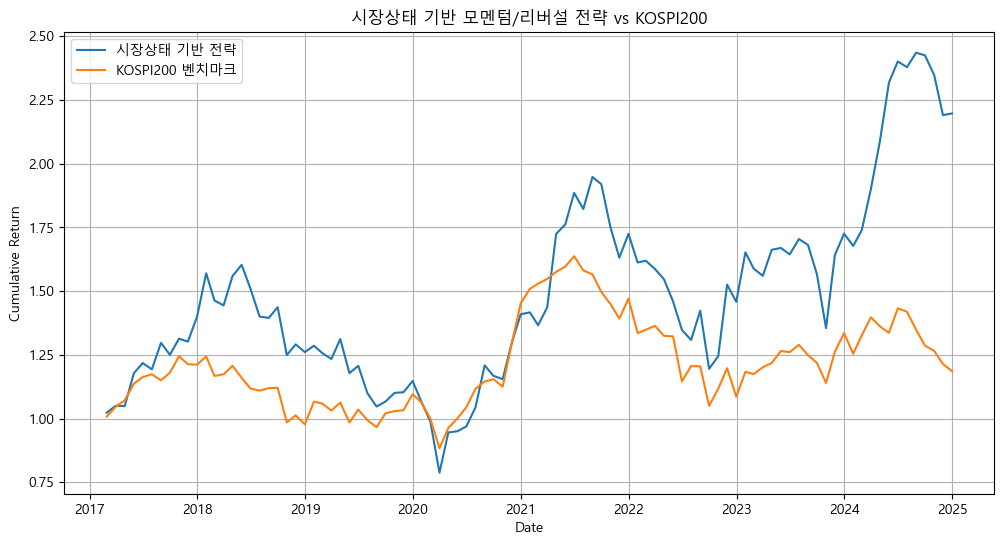

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(result.index, result['cum_strategy'], label='시장상태 기반 전략')
plt.plot(result.index, result['cum_benchmark'], label='KOSPI200 벤치마크')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Reversal Momentum Strategy vs KOSPI200')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
result.index = pd.to_datetime(result.index)

# 누적 수익률
final_strategy = result['cum_strategy'].iloc[-1]
final_benchmark = result['cum_benchmark'].iloc[-1]

print(f"Reversal Momentum Strategy 누적 수익률: {final_strategy - 1:.2%}")
print(f"KOSPI200 누적 수익률   : {final_benchmark - 1:.2%}")

Momentum Reversal 전략 누적 수익률: 119.73%
KOSPI200 누적 수익률   : 18.55%


In [ ]:
def calculate_max_drawdown(series):
    # 고점 누적
    rolling_max = series.cummax()
    # 고점 대비 하락률
    drawdown = series / rolling_max - 1.0
    # 최댓값 =가장 큰 낙폭
    max_drawdown = drawdown.min()
    return max_drawdown

mdd_strategy = calculate_max_drawdown(result['cum_strategy'])
mdd_benchmark = calculate_max_drawdown(result['cum_benchmark'])

print("Strategy Max Drawdown:", mdd_strategy)
print("Benchmark Max Drawdown:", mdd_benchmark)

Strategy Max Drawdown: -0.5088999454936605
Benchmark Max Drawdown: -0.35885516361316183


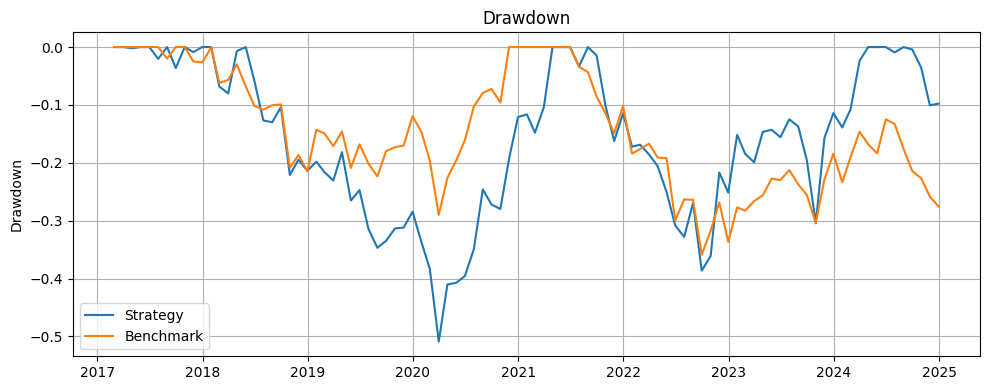

In [16]:
import matplotlib.pyplot as plt

def plot_drawdown(cum_wealth, label="Strategy"):
    rolling_max = cum_wealth.cummax()
    drawdown = cum_wealth / rolling_max - 1.0
    plt.plot(drawdown, label=label)
    return drawdown

plt.figure(figsize=(10,4))
plot_drawdown(result['cum_strategy'], "Strategy")
plot_drawdown(result['cum_benchmark'], "Benchmark")
plt.title("Drawdown")
plt.ylabel("Drawdown")
plt.xlabel("")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
import numpy as np

def infer_periods_per_year(index):
    avg_days = np.median(np.diff(index.values).astype('timedelta64[D]').astype(int))
    if avg_days <= 2:
        return 252
    elif avg_days <= 10:
        return 52
    elif avg_days <= 40:
        return 12
    else:
        return 1

def calculate_sharpe_ratio(cum_wealth, risk_free_rate_annual=0.0):
    returns = cum_wealth.pct_change().dropna()
    periods_per_year = infer_periods_per_year(cum_wealth.index)
    rf_periodic = (1 + risk_free_rate_annual)**(1/periods_per_year) - 1
    excess = returns - rf_periodic
    mu_ann = excess.mean() * periods_per_year
    vol_ann = excess.std(ddof=1) * np.sqrt(periods_per_year)
    return mu_ann / vol_ann if vol_ann != 0 else np.nan

sharpe_strategy  = calculate_sharpe_ratio(result['cum_strategy'])
sharpe_benchmark = calculate_sharpe_ratio(result['cum_benchmark'])

print("Sharpe Ratio (Strategy):", sharpe_strategy)
print("Sharpe Ratio (Benchmark):", sharpe_benchmark)

Sharpe Ratio (Strategy): 0.4939932361715361
Sharpe Ratio (Benchmark): 0.20445811924410862


### **Limitations and Potential Biases of the Strategy**
**1) Transaction Costs Ignored**

The strategy assumes frictionless trading by ignoring real-world transaction costs such as commissions, taxes, and slippage incurred during monthly rebalancing. In practice, these costs can accumulate and significantly reduce net returns. Without incorporating even modest cost estimates (e.g., 0.3%–0.5% per trade), the backtest is likely to overstate the strategy's performance.

**2) Mismatch in Benchmark Weighting Method**

The KOSPI200 benchmark is market-cap weighted, whereas the strategy uses an equal-weighted portfolio. This difference in methodology leads to a natural bias toward smaller-cap stocks in the strategy, which can exaggerate outperformance when compared to a large-cap weighted index. For a more accurate evaluation, either the strategy should be benchmarked against an equal-weighted index or adjusted to reflect market-cap weighting.

**3) Lag in Market Regime Classification**

The strategy defines market regimes based on trailing 24-month cumulative returns, which is inherently a backward-looking approach. As a result, regime shifts may be detected too late, reducing the effectiveness of timely strategy switching. In volatile or rapidly changing markets, this lag could undermine the benefits of dynamic allocation. More responsive indicators or complementary forward-looking signals may be needed to improve regime detection.

**4) Limited Downside Protection**  
Although the strategy achieves a higher Sharpe ratio compared to the benchmark, the drawdown analysis reveals that it does not effectively protect against market downturns. Large declines are still observed, indicating that while the strategy improves risk-adjusted returns, it lacks strong downside defense. This limitation is particularly important for investors who prioritize capital preservation during periods of market stress.

### **Step 4. Market Capitalization Weighting**

In [15]:
# 분석 기간 설정
start = '2015-01-01'
end = '2024-12-31'

kospi = fdr.StockListing('KOSPI')

# KOSPI200
kospi200_like = kospi.sort_values(by='Marcap', ascending=False).head(200)
tickers = kospi200_like['Code'].tolist()

In [ ]:
df_all = fdr.StockListing('KOSPI')

kospi200_like = df_all.sort_values(by='Marcap', ascending=False).head(200)
kospi200_like = kospi200_like[['Code', 'Name']]
kospi200_like.columns = ['ticker', 'name']

# 분석 기간 설정
start_date = '2015-01-01'
end_date = '2024-12-31'

price_list = []

for _, row in tqdm(kospi200_like.iterrows(), total=len(kospi200_like)):
    code = row['ticker']
    try:
        df = fdr.DataReader(code, start=start_date, end=end_date)
        df = df[['Close']].copy()
        df.index.name = 'date'
        df['ticker'] = code

        # 상장주식 수로 시가총액 계산 -> 시가총액 계산을 수동으로 함
        shares = df_all[df_all['Code'] == code]['Stocks'].values[0]
        df['Marcap'] = df['Close'] * shares

        df = df.reset_index()
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date').resample('M').last().dropna().reset_index()
        price_list.append(df)

    except Exception as e:
        print(f"[{code}] 에러: {e}")
        continue

df_price = pd.concat(price_list)
df_price = df_price[['date', 'ticker', 'Close', 'Marcap']]
df_price.columns = ['date', 'ticker', 'close', 'marcap']
df_price.to_csv("kospi200_fdr_prices_monthly.csv", index=False)

  0%|          | 0/200 [00:00<?, ?it/s]C:\Users\shinw\AppData\Local\Temp\ipykernel_3312\4174433963.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('date').resample('M').last().dropna().reset_index()
  0%|          | 1/200 [00:11<37:27, 11.29s/it]C:\Users\shinw\AppData\Local\Temp\ipykernel_3312\4174433963.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('date').resample('M').last().dropna().reset_index()
  1%|          | 2/200 [00:11<15:34,  4.72s/it]C:\Users\shinw\AppData\Local\Temp\ipykernel_3312\4174433963.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('date').resample('M').last().dropna().reset_index()
  2%|▏         | 3/200 [00:11<08:36,  2.62s/it]C:\Users\shinw\AppData\Local\Temp\ipykernel_3312\4174433963.py:29: FutureWarning: 'M' is deprecated and wi

In [ ]:
df_price = pd.read_csv("kospi200_fdr_prices_monthly.csv")

In [ ]:
# 피벗 테이블
price_pivot = df_price.pivot(index='date', columns='ticker', values='close').sort_index()
marcap_pivot = df_price.pivot(index='date', columns='ticker', values='marcap').sort_index()

ret_1m = price_pivot.pct_change(periods=1)
ret_3m = price_pivot.pct_change(periods=3)

In [ ]:
def zscore(df):
    return (df - df.mean(axis=1, skipna=True).values[:, None]) / df.std(axis=1, skipna=True).values[:, None]

score = -zscore(ret_1m) - 0.5 * zscore(ret_3m)  # 낙폭 큰 종목 우선

In [ ]:
import FinanceDataReader as fdr

# 벤치마크
benchmark_daily = fdr.DataReader('KS200', start='2015-01-01', end='2024-12-31')
benchmark = benchmark_daily['Close'].resample('M').last()
benchmark.name = 'KOSPI200'

# 24개월 수익률로 시장상황 판단
market_state = benchmark.pct_change(periods=24)
is_bull = market_state > 0

C:\Users\shinw\AppData\Local\Temp\ipykernel_3312\3037276010.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  benchmark = benchmark_daily['Close'].resample('M').last()


In [ ]:
n_stocks = 20

portfolio_weights = pd.DataFrame(index=score.index, columns=score.columns)

for date in score.index:
    if date not in is_bull:
        continue

    if is_bull.loc[date]:  # Bull market → 모멘텀
        selected = score.loc[date].nlargest(n_stocks).index
    else:  # Bear market → 리버설
        selected = score.loc[date].nsmallest(n_stocks).index

    # 시가총액 기준 가중치
    weights = marcap_pivot.loc[date, selected]
    weights = weights / weights.sum()
    portfolio_weights.loc[date, selected] = weights


In [ ]:
future_ret = price_pivot.pct_change().shift(-1)
strategy_ret = (portfolio_weights * future_ret).sum(axis=1)

In [34]:
result = pd.DataFrame({
    'Strategy': (1 + strategy_ret).cumprod(),
    'KOSPI200': (1 + benchmark.pct_change()).cumprod()
})

def calculate_cagr(series):
    years = (series.index[-1] - series.index[0]).days / 365.25
    return series.iloc[-1]**(1/years) - 1

cagr_strategy = calculate_cagr(result['Strategy'])
cagr_benchmark = calculate_cagr(result['KOSPI200'])

print(f"Market-Cap Weighted Reversal Momentum Strategy 누적 수익률: {result['Strategy'].iloc[-1]:.4f}")
print(f"벤치마크 누적 수익률: {result['KOSPI200'].iloc[-1]:.4f}")
print(f"Market-Cap Weighted Reversal Momentum Strategy CAGR: {cagr_strategy:.4f}")
print(f"벤치마크 CAGR: {cagr_benchmark:.4f}")


Market-Cap Weighted Reversal Momentum Strategy 누적 수익률: 1.2390
벤치마크 누적 수익률: 1.2719
Market-Cap Weighted Reversal Momentum Strategy CAGR: 0.0218
벤치마크 CAGR: 0.0245


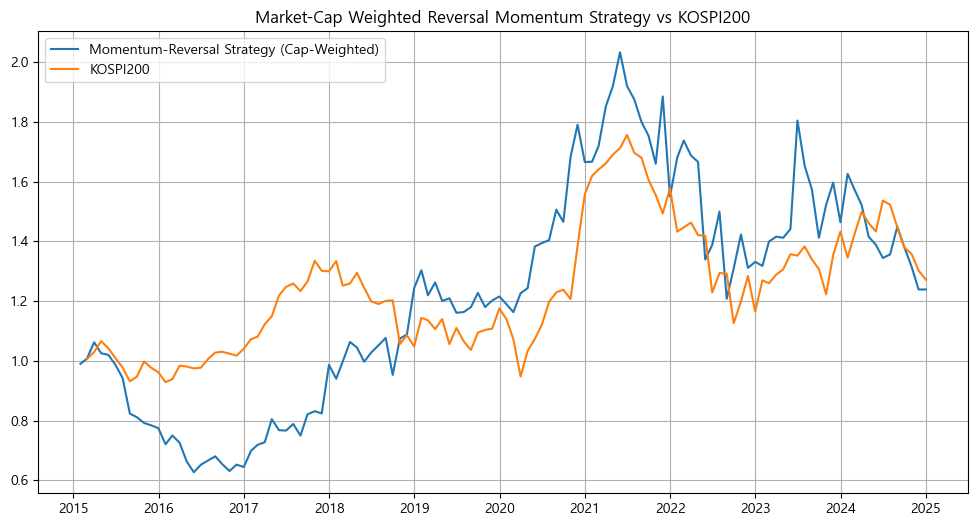

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(result.index, result['Strategy'], label='Momentum-Reversal Strategy (Cap-Weighted)')
plt.plot(result.index, result['KOSPI200'], label='KOSPI200')
plt.legend()
plt.title("Market-Cap Weighted Reversal Momentum Strategy vs KOSPI200")
plt.grid(True)
plt.show()

In [36]:
print(f"Market-Cap Weighted Reversal Momentum Strategy 누적 수익률   : {(result['Strategy'].iloc[-1] - 1)*100:.2f}%")
print(f"벤치마크 누적 수익률: {(result['KOSPI200'].iloc[-1] - 1)*100:.2f}%")
print(f"Market-Cap Weighted Reversal Momentum Strategy CAGR          : {cagr_strategy*100:.2f}%")
print(f"벤치마크 CAGR      : {cagr_benchmark*100:.2f}%")

Market-Cap Weighted Reversal Momentum Strategy 누적 수익률   : 23.90%
벤치마크 누적 수익률: 27.19%
Market-Cap Weighted Reversal Momentum Strategy CAGR          : 2.18%
벤치마크 CAGR      : 2.45%


### **Why Is the Market-Cap Weighted Reversal Momentum Strategy Underperforming?**

**1️) Weaker Reversal Effects in Large-Cap Stocks**

Reversal strategies typically rely on short-term price overreactions, where stocks that have declined significantly tend to rebound. However, large-cap stocks—which dominate in a market-cap weighted portfolio—tend to be more efficiently priced due to faster information dissemination and greater investor attention. This means that the price anomalies reversal strategies exploit are weaker or absent in large-cap names.

**2) Structural Overlap with Benchmark & Reduced Diversification**

Since the KOSPI200 index is already market-cap weighted, and heavily concentrated in a few large-cap stocks like Samsung Electronics and SK Hynix, a market-cap weighted reversal strategy ends up holding very similar exposures to the benchmark. At the same time, equal-weighted portfolios benefit from broader diversification, giving more weight to mid- and small-cap stocks where reversal effects are typically stronger. In contrast, market-cap weighted portfolios concentrate on large caps, limiting exposure to reversal opportunities and reducing portfolio differentiation.

### **Step 5. Portfolio Construction with Strategic Asset Allocation**

In [ ]:
# KODEX 국고채3년 ETF
bond = fdr.DataReader('114260', start='2015-01-01', end='2024-12-31')
bond_monthly = bond['Close'].resample('M').last()
bond_ret = bond_monthly.pct_change().dropna()
bond_ret.name = 'bond_ret'

C:\Users\shinw\AppData\Local\Temp\ipykernel_3312\4022567458.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bond_monthly = bond['Close'].resample('M').last()


In [38]:
combined_df = pd.concat([strategy_ret, bond_ret], axis=1).dropna()
combined_df.columns = ['strategy_ret', 'bond_ret']

In [ ]:
# 70:30 자산배분 수익률
combined_df['portfolio_ret'] = 0.7 * combined_df['strategy_ret'] + 0.3 * combined_df['bond_ret']
combined_df['cum_portfolio'] = (1 + combined_df['portfolio_ret']).cumprod()
combined_df['cum_strategy'] = (1 + combined_df['strategy_ret']).cumprod()
combined_df['cum_bond'] = (1 + combined_df['bond_ret']).cumprod()

In [43]:
# 위와 동일한 함수 정의
def calculate_cagr(series):
    years = (series.index[-1] - series.index[0]).days / 365.25
    return series.iloc[-1]**(1/years) - 1

cagr_portfolio = calculate_cagr(combined_df['cum_portfolio'])
cagr_strategy = calculate_cagr(combined_df['cum_strategy'])
cagr_bond = calculate_cagr(combined_df['cum_bond'])

print(f"Reversal Momentum Strategy 누적 수익률: {combined_df['cum_strategy'].iloc[-1] - 1:.2%}")
print(f"국고채3년 ETF 누적 수익률: {combined_df['cum_bond'].iloc[-1] - 1:.2%}")
print(f"70/30 포트폴리오 누적 수익률: {combined_df['cum_portfolio'].iloc[-1] - 1:.2%}")
print(f"\nReversal Momentum Strategy CAGR: {cagr_strategy:.2%}")
print(f"채권 CAGR: {cagr_bond:.2%}")
print(f"70/30 포트폴리오 CAGR: {cagr_portfolio:.2%}")

Reversal Momentum Strategy 누적 수익률: 25.14%
국고채3년 ETF 누적 수익률: 18.87%
70/30 포트폴리오 누적 수익률: 30.90%

Reversal Momentum Strategy CAGR: 2.31%
채권 CAGR: 1.77%
70/30 포트폴리오 CAGR: 2.77%


C:\Users\shinw\AppData\Local\Temp\ipykernel_3312\227849048.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\shinw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


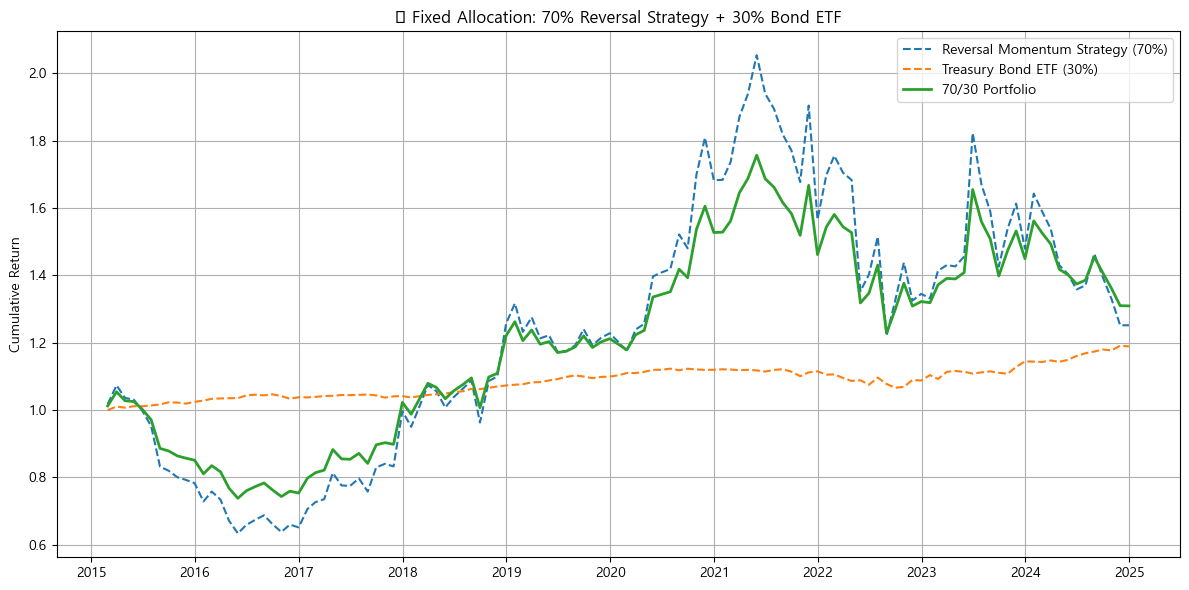

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(combined_df['cum_strategy'], label='Reversal Momentum Strategy (70%)', linestyle='--')
plt.plot(combined_df['cum_bond'], label='Treasury Bond ETF (30%)', linestyle='--')
plt.plot(combined_df['cum_portfolio'], label='70/30 Portfolio', linewidth=2)
plt.title('Fixed Allocation: 70% Reversal Strategy + 30% Bond ETF')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### **Evaluation of the 70/30 Asset Allocation Portfolio Strategy**
Asset allocation proves to be an effective way to reduce volatility without sacrificing returns. It pairs especially well with a regime-dependent strategy that switches between reversal and momentum.

### **Step 6. CAPM Diagnostic of Portfolio Performance**

In [48]:
!pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
file_path = "cd91.csv"
df = pd.read_csv(file_path, encoding='utf-8')

rate_row = df.iloc[0, 5:]
rate_row.index = pd.to_datetime(rate_row.index, format="%Y/%m/%d")
rate_row = rate_row.astype(float)

# 리샘플링
daily_rate = rate_row.sort_index()
daily_rate.index.name = 'date'
monthly_rf = daily_rate.resample('M').last() / 100

# 월간 무위험 수익률
rf_monthly_return = monthly_rf / 12
rf_monthly_return.name = 'rf'
rf_monthly_return = rf_monthly_return.to_frame()

print(rf_monthly_return.head())

                  rf
date                
2015-01-31  0.001767
2015-02-28  0.001750
2015-03-31  0.001542
2015-04-30  0.001500
2015-05-31  0.001500


C:\Users\shinw\AppData\Local\Temp\ipykernel_3312\376493639.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rf = daily_rate.resample('M').last() / 100  # 연금리를 소수로 변환 (ex. 2.13 → 0.0213)


In [ ]:
import statsmodels.api as sm

# 월별 수익률
strategy_return = result['Strategy'].pct_change().dropna()
benchmark_return = result['KOSPI200'].pct_change().dropna()

# 무위험 수익률
rf = rf_monthly_return['rf']
rf = rf.loc[strategy_return.index]

# 초과 수익률
excess_strategy = strategy_return - rf
excess_benchmark = benchmark_return - rf

df_reg = pd.DataFrame({
    'y': excess_strategy,
    'x': excess_benchmark
}).dropna()

# 독립변수에 상수항 추가
X = sm.add_constant(df_reg['x'])
y = df_reg['y']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.607
Date:                Mon, 01 Sep 2025   Prob (F-statistic):              0.207
Time:                        18:25:40   Log-Likelihood:                 147.39
No. Observations:                 118   AIC:                            -290.8
Df Residuals:                     116   BIC:                            -285.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.006      0.435      0.6

C:\Users\shinw\AppData\Local\Temp\ipykernel_3312\1435573420.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  strategy_return = result['Strategy'].pct_change().dropna()


### **Evaluation of the CAPM Regression**
The strategy exhibits a market-neutral characteristic. It aims to generate returns regardless of overall market direction. However, both the alpha and beta are not statistically significant.